# Netflix Data Analysis


## Our approach to the Data Analysis :
1. Importing necesarry libraries and Loading the Data
2. Understanding, Breaking down and Pre-processing the Data
3. Cleaning the Data
4. Visualising the Data (Graphs, Pie-charts and histograms)
5. Results and Insights

## Importing Libraries 

1. Numpy : It is a library for performing statistical and mathematical operations on arrays and matrices.
2. Pandas : It is a library for data manipulation and analysis. It offers data structures and various mathematical operations.
3. Matplotlib and Seaborn : they are both libraries for plotting statistical graphs

In [1]:
# Importing NumPy for numerical computing
# Importing pandas for data analysis and manipulation
# Importing MatPlotLib and Seaborn for plotting and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1) Loading the Data 

Opendatasets : It is a python library for downloading datasets from online Sources like Kaggle and Google Drive. 
1. We install it to our notebook
2. We import it as od 
3. We create a Kaggle account, Create our own API key and use given username and key as credentials to download our dataset.

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/infamouscoder/dataset-netflix-shows")

Skipping, found downloaded files in ".\dataset-netflix-shows" (use force=True to force download)


In [4]:
#We import OS to figure out our current directory and find the path to our file.
import os

notebook_path = os.getcwd()
print(notebook_path)

C:\Users\KIIT\Downloads


In [5]:
#Assigning a variable to our dataset to use it conveniently 

df = pd.read_csv(r"C:\Users\KIIT\dataset-netflix-shows\netflix_titles.csv")

## 2) Understanding and Preprocessing the data

In [6]:
#Shows the shape and dimension of the data : number of rows and columns 

df.shape

(8807, 12)

In [7]:
# Shows top 5 rows of the dataset 

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
# Print DataFrame information such as Datatype and Non-Null values count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### There are no null values in any columns

In [9]:
#Check for missing values in columns 

df.isna()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#### Columns with missing values are (highest to lowest) :
    1. director
    2. country
    3. cast 
    4. rating
    5. duration

In [11]:
#Checking for duplicate values in the data

df.duplicated().sum()

0

#### No duplicate values found (i.e a two rows with exact same data)

## 3) Cleaning the Data : Sections by Shreyansh Singh

In [12]:
# Summarize properties of numerical columns in DataFrame
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


1. The mean could represent what year most movies have been released.
2. The max could represent the final released year for the dataset
3. The min could represent the earliest recorded year in the dataset

In [13]:
# Get column names of DataFrame
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [14]:
# Rename columns in DataFrame (date_added -> date, listed_in -> category)

df.rename(columns={'date_added':'date',"listed_in":"category"},inplace=True)

In [15]:
# Convert 'date' column to datetime format (assuming mixed formats)

df['date'] = pd.to_datetime(df['date'], format="mixed")
df.head()

,show_id,type,title,director,cast,country,date,release_year,rating,duration,category,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date          8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  category      8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [17]:
df.describe()

,date,release_year
count,8797,8807.000000
mean,2019-05-17 05:59:08.436967168,2014.180198
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-02 00:00:00,2017.000000
75%,2020-08-19 00:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.819312


In [18]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date',
       'release_year', 'rating', 'duration', 'category', 'description'],
      dtype='object')

##### Removing columns I do not want to use in my analysis

In [19]:
df = df[['show_id', 'type', 'title', 'director', 'cast', 'country', 'date',
       'release_year', 'rating', 'duration', 'category']]

##### Fill missing values in specific columns with 'unavailable'

In [20]:
df.fillna({"rating":'unavailable',"date":'unavailable',"duration":'unavailable',"cast":'unavailable',"country":'unavailable',"director":'unavailable'},inplace = True)

# Check for remaining missing values (sum of NaNs by column)

df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date            0
release_year    0
rating          0
duration        0
category        0
dtype: int64

In [21]:
df.head()

,show_id,type,title,director,cast,country,date,release_year,rating,duration,category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unavailable,United States,2021-09-25 00:00:00,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unavailable,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,unavailable,unavailable,unavailable,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,unavailable,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


## Visualisation of the Data : Sections by Ashwini Kumar Singh

### Ratio of movies vs TV shows on the platform

In [22]:
# Count occurrences of each type (Series) and reset index for DataFrame view
# Create new Series containing counts for each type
# Convert value counts Series to list for pie chart data

showtype = df['type'].value_counts().reset_index()
showtype_counts = df['type'].value_counts()
showtype_pie_data = showtype_counts.tolist()
showtype

,type,count
0,Movie,6131
1,TV Show,2676


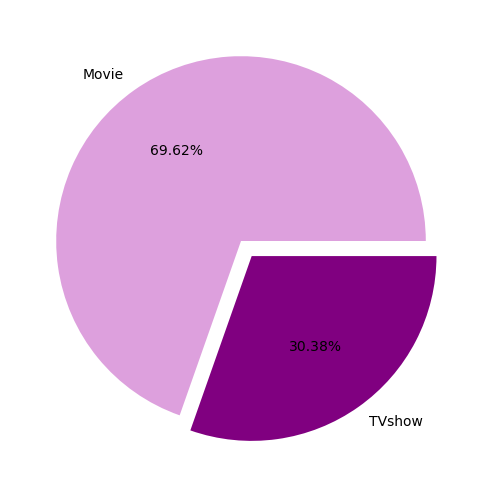

In [23]:
# Define plot size

plt.figure(figsize=(6,6))

# Created pie chart

plt.pie(showtype_pie_data, # Data for pie slices (list of counts)
        labels=['Movie','TVshow'], # Labels for each slice
        autopct='%1.2f%%',explode=[0,0.1],# Format for displaying percentages (2 decimal places) & Explode 'TV Show' slice
        colors=['plum', 'purple'])# Colors for pie slices
plt.show()

### All Netflix content count per country

In [24]:
# DataFrame showing top 21 countries with Netflix content by count

country = pd.DataFrame(df['country'].value_counts().reset_index())[0:21]
country.columns = ['Country', 'Count']
country

,Country,Count
0,United States,2818
1,India,972
2,unavailable,831
3,United Kingdom,419
4,Japan,245
5,South Korea,199
6,Canada,181
7,Spain,145
8,France,124
9,Mexico,110


Text(0.5, 1.0, 'Country wise content on Netflix')

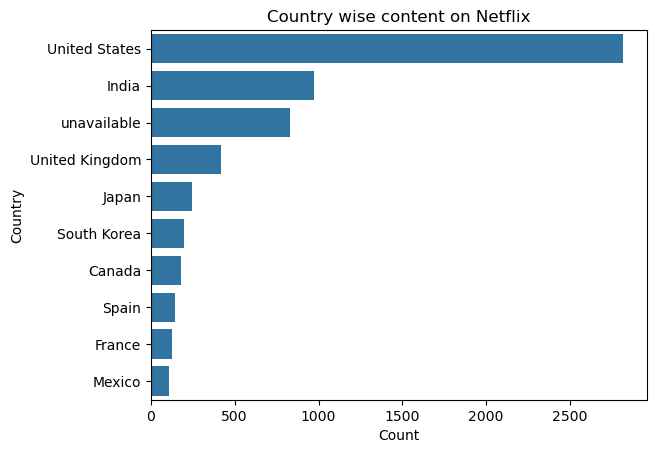

In [25]:
#Barplot of the Country wise content count

sns.barplot(country.head(10) , y = 'Country' , x = 'Count')
plt.title("Country wise content on Netflix")

### Ratio of Movie vs TV show for each country

In [26]:
df.head()

,show_id,type,title,director,cast,country,date,release_year,rating,duration,category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unavailable,United States,2021-09-25 00:00:00,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unavailable,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,unavailable,unavailable,unavailable,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,unavailable,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


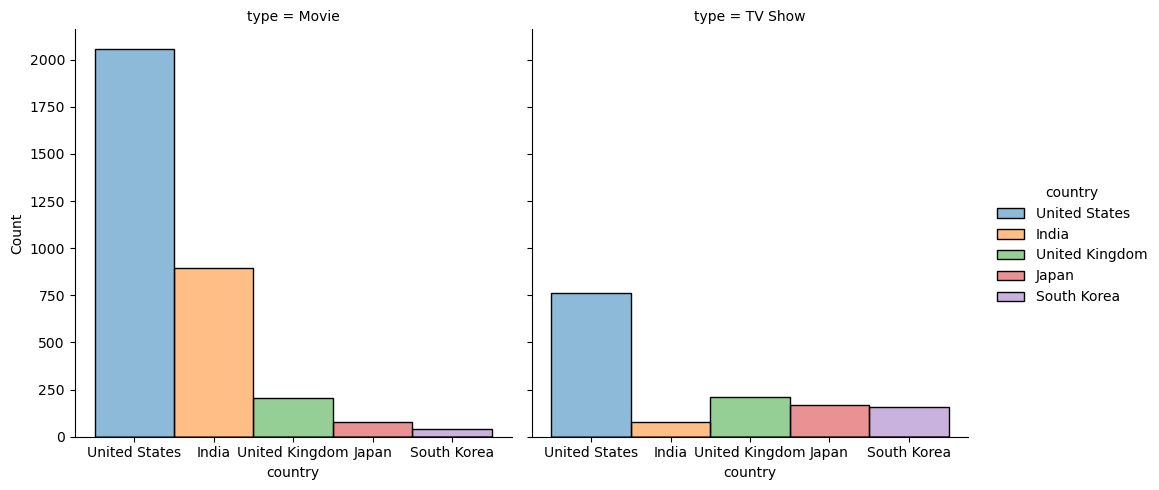

In [27]:
#Listing the top 5 countries with highest amount of netflix content
desired_countries = ["United States", "India", "United Kingdom", "Japan", "South Korea"]

#creating a dataframe that only keeps data that has country value same as my given list of names.
filtered_df = df[df['country'].isin(desired_countries)]

#plotting a distributed plot of my countries seperately for tv shows and movies.
Comparison = filtered_df[['country','type']]
sns.displot(data = Comparison, x = 'country', col = 'type', hue = 'country', binwidth = 1)

In [28]:
# Sorted 'country' DataFrame by 'Count' descending and select top 10 entries

top10_country=country.sort_values(by='Count',ascending=False).head(10)
top10_country


,Country,Count
0,United States,2818
1,India,972
2,unavailable,831
3,United Kingdom,419
4,Japan,245
5,South Korea,199
6,Canada,181
7,Spain,145
8,France,124
9,Mexico,110


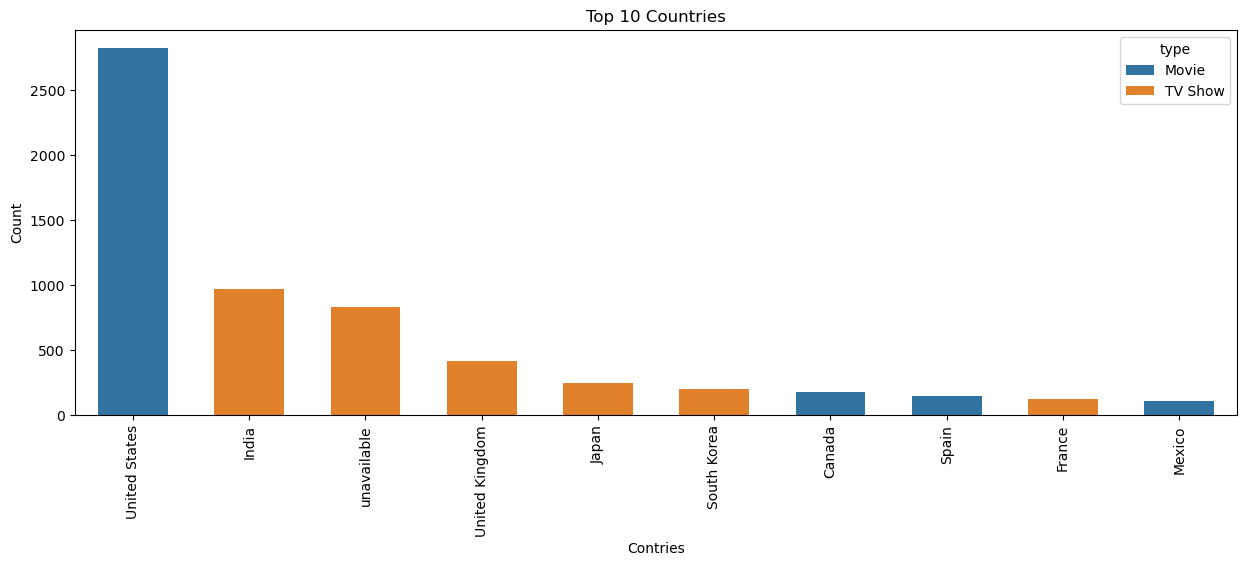

In [29]:
# Set plot dimensions (width 15, height 5)
plt.figure(figsize=(15,5))

# Create bar chart with hue for movie/TV show types
sns.barplot(data=top10_country,x='Country',y='Count',hue=df['type'],width=0.6)
plt.ylabel('Count')
plt.xlabel('Contries')
plt.title('Top 10 Countries')
plt.xticks(rotation=90)
plt.show()

### Counting Directors with highest number of netflix releases

In [30]:
# Count occurrences of each director and show top 10
directors = df['director'].value_counts()
directors.head(10)

director
unavailable               2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Youssef Chahine             12
Martin Scorsese             12
Name: count, dtype: int64

In [31]:
# Filter DataFrame to exclude entries with 'unavailable' director (assuming 'director' column)

filtered_df = df[df['director'] != "unavailable"]
directors = filtered_df['director'].value_counts()
directors.head(10)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64

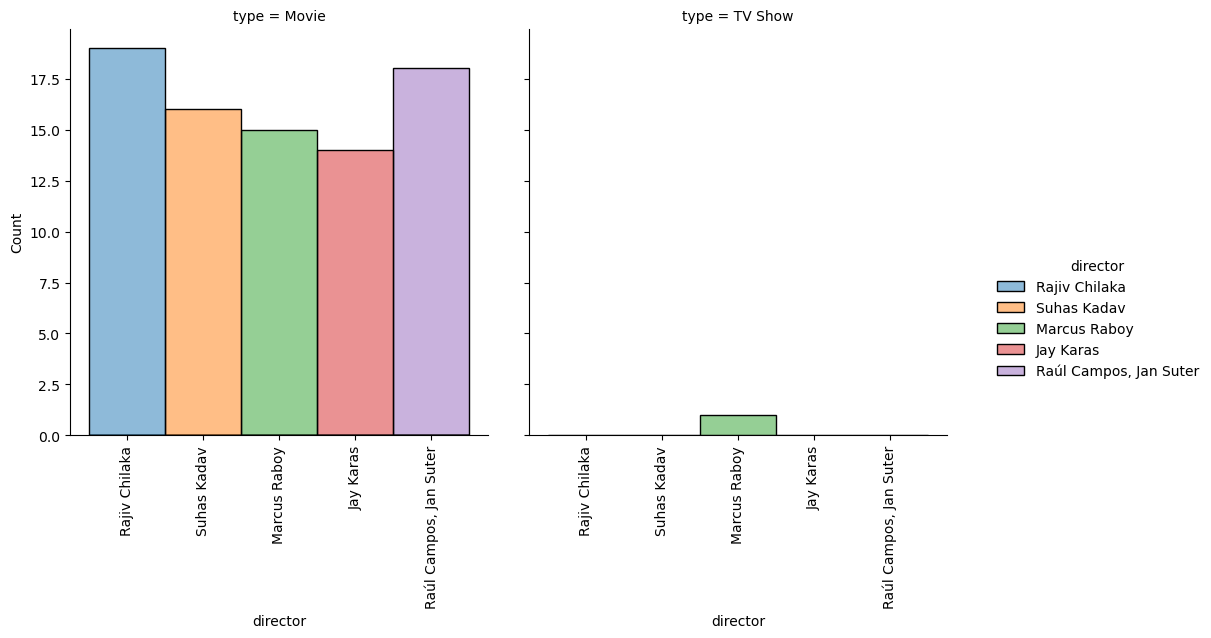

In [32]:
#Listing the top 5 directors with highest amount of netflix releases
desired_directors = ["Rajiv Chilaka", "Raúl Campos, Jan Suter", "Marcus Raboy", "Suhas Kadav", "Jay Karas"]

#creating a dataframe that only keeps data that has country value same as my given list of names.
filtered_df1 = df[df['director'].isin(desired_directors)]

#plotting a distributed plot of my countries seperately for tv shows and movies.
Comparison = filtered_df1[['director','type']]
# Create the displot with hue set to 'director' for color-coding
g = sns.displot(data=Comparison, x='director', col='type', hue='director')

# Loop through subplots for x-tick rotation (optional)
for ax in g.axes.flat:
    plt.sca(ax)
    plt.xticks(rotation=90)
plt.show()

In [33]:
# Show top 10 most frequent directors for TV shows
# Filter DataFrame to exclude entries with 'Movie' type (assuming 'type' column)

filtered_df2 = df[df['type'] != "Movie"]
filtered_df2 = filtered_df2[filtered_df2['director'] != "unavailable"]
TV_directors = filtered_df2['director'].value_counts()
TV_directors.head(10)

director
Alastair Fothergill    3
Rob Seidenglanz        2
Hsu Fu-chun            2
Iginio Straffi         2
Shin Won-ho            2
Ken Burns              2
Stan Lathan            2
Thomas Astruc          1
Quek Shio-chuan        1
Elías León             1
Name: count, dtype: int64

### Amount of netflix content released over the years

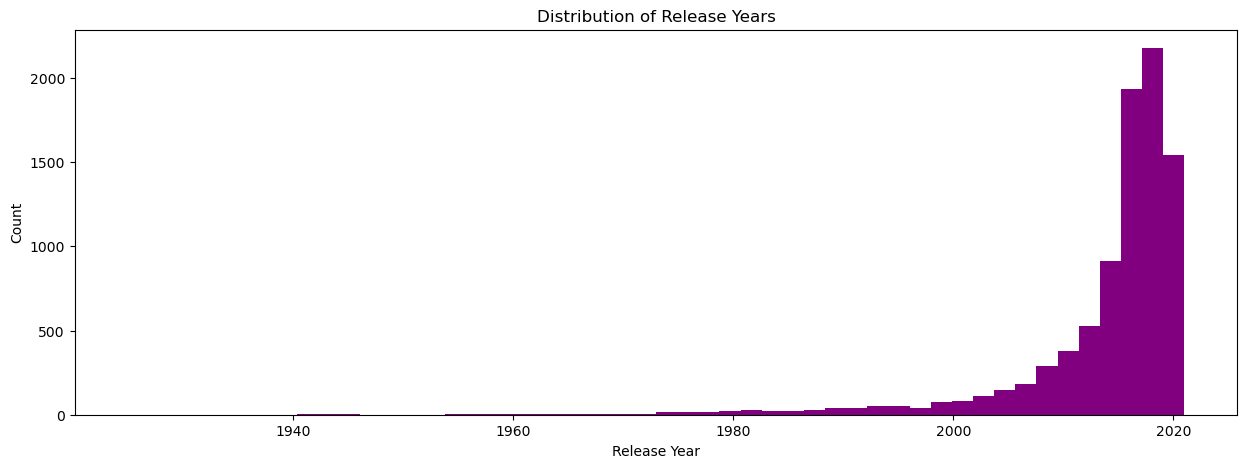

In [34]:
#Plot histogram for the content count through the years

plt.figure(figsize=(15,5))
df['release_year'].plot(kind='hist', bins=50, color=['purple'])
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

## Top Netflix Content Cetegories : Sections by Anirban Basak

Text(0.5, 1.0, 'Category wise content on Netflix')

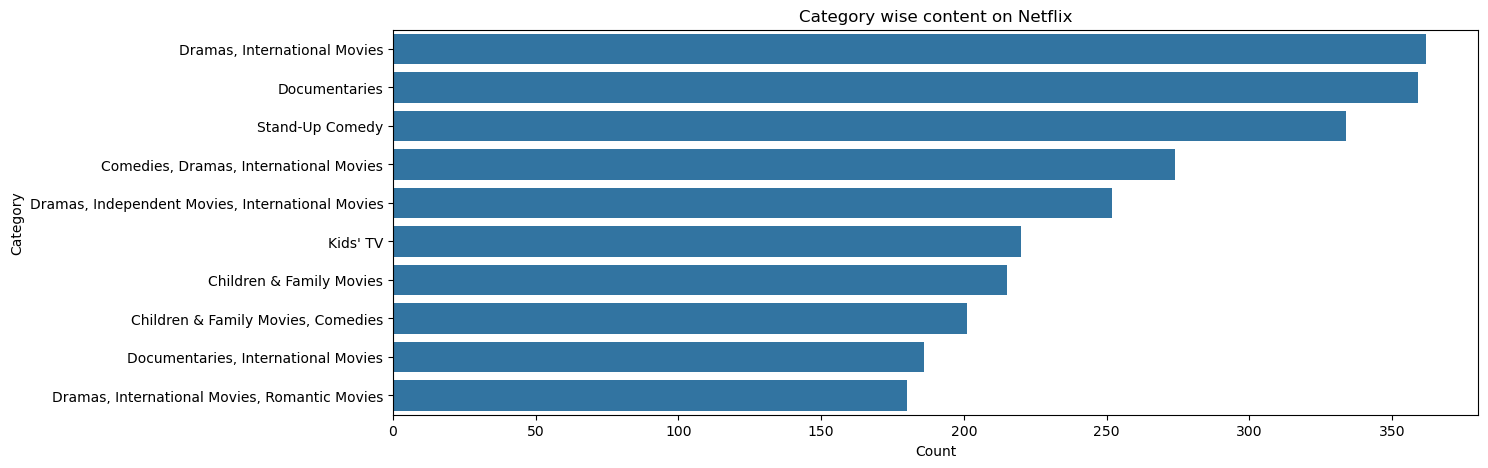

In [35]:
plt.figure(figsize = (14,5))
Category = pd.DataFrame(df['category']
                         # Count occurrences of each category
                        .value_counts()
                        # Convert Series to DataFrame with index as column
                        .reset_index())[0:21]
Category.columns = ['Category', 'Count']

#plotting bar chart for the Categories
sns.barplot(Category.head(10) , y = 'Category' , x = 'Count')
plt.title("Category wise content on Netflix")

In [36]:
top_10_listed_in_movie = (Category.loc[df['type'] == 'Movie']  # Filter movies using boolean indexing
                          .sort_values(by='Count', ascending=False)  # Sort by 'count' descending
                          .reset_index(drop=True)  # Reset index with dropped old index
                          .head(10))  # Select top 10 entries
top_10_listed_in_movie


,Category,Count
0,"Dramas, International Movies",362
1,Children & Family Movies,215
2,"Children & Family Movies, Comedies",201
3,"Dramas, International Movies, Romantic Movies",180
4,Dramas,138
5,"Dramas, International Movies, Thrillers",134
6,"International TV Shows, TV Dramas",121
7,"Crime TV Shows, International TV Shows, TV Dramas",110


<Figure size 1500x500 with 0 Axes>

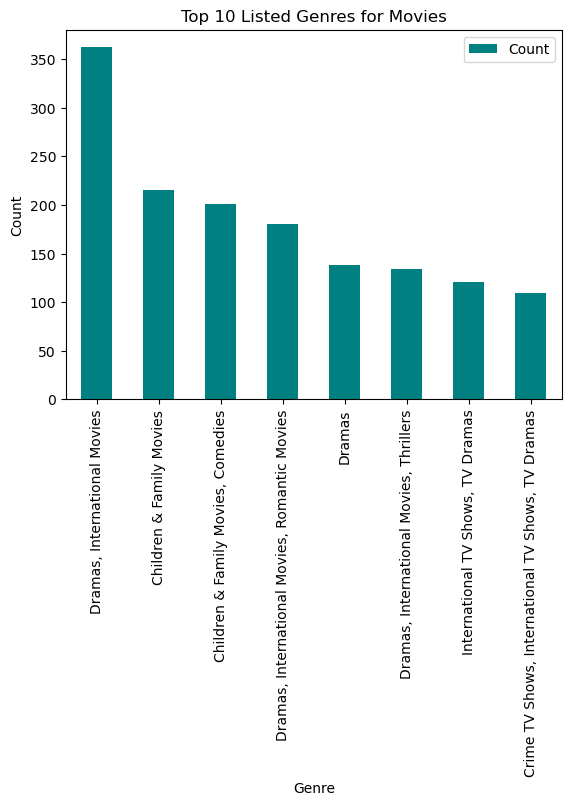

In [37]:
#Plot a bar graph for the top ten movie categories

plt.figure(figsize = (15,5))
top_10_listed_in_movie.plot(x='Category', y='Count', kind='bar', color = 'Teal')
plt.title('Top 10 Listed Genres for Movies')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [38]:
top_10_listed_in_TV = (Category.loc[df['type'] == 'TV Show']  # Filter TV shows using boolean indexing
                          .sort_values(by='Count', ascending=False)  # Sort by 'count' descending
                          .reset_index(drop=True)  # Reset index with dropped old index
                          .head(10))  # Select top 10 entries
top_10_listed_in_TV

,Category,Count
0,Documentaries,359
1,Stand-Up Comedy,334
2,"Comedies, Dramas, International Movies",274
3,"Dramas, Independent Movies, International Movies",252
4,Kids' TV,220
5,"Documentaries, International Movies",186
6,"Comedies, International Movies",176
7,"Comedies, International Movies, Romantic Movies",152
8,"Action & Adventure, Dramas, International Movies",132
9,Action & Adventure,128


<Figure size 1500x500 with 0 Axes>

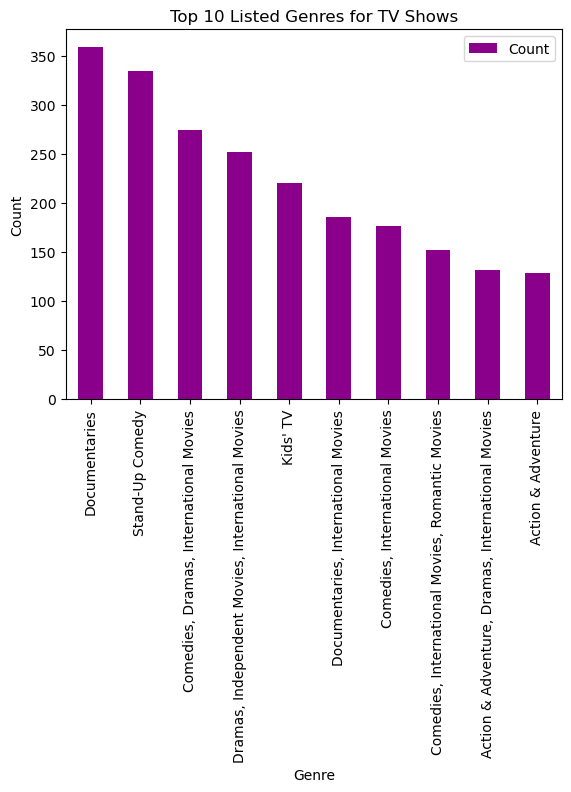

In [39]:
#Plot a bar graph for the top ten movie categories

plt.figure(figsize = (15,5))
top_10_listed_in_TV.plot(x='Category', y='Count', kind='bar', color = 'darkmagenta')
plt.title('Top 10 Listed Genres for TV Shows')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### Count of Movie Ratings

In [51]:
# Count occurrences of each rating and create DataFrame (top 21)
rating = pd.DataFrame(df['rating'].
                      value_counts().
                      reset_index())[0:11]
rating.columns = ['Rating', 'Count']
rating

,Rating,Count
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


In [42]:
df_filter = df[df['type'] != 'unavailable']
ratings = df_filter.groupby(['rating', 'type'])['rating'].value_counts().reset_index()
top_10_movie_ratings = (ratings.loc[ratings['type'] == 'Movie']  # Filter Movie using boolean indexing
                          .sort_values(by='count', ascending=False)  # Sort by 'count' descending
                          .reset_index(drop=True)  # Reset index with dropped old index
                          .head(10))  # Select top 10 entries
top_10_movie_ratings

,rating,type,count
0,TV-MA,Movie,2062
1,TV-14,Movie,1427
2,R,Movie,797
3,TV-PG,Movie,540
4,PG-13,Movie,490
5,PG,Movie,287
6,TV-Y7,Movie,139
7,TV-Y,Movie,131
8,TV-G,Movie,126
9,NR,Movie,75


In [43]:
top_TV_shows_ratings = (ratings.loc[ratings['type'] == 'TV Show']  # Filter TV shows using boolean indexing
                          .sort_values(by='count', ascending=False)  # Sort by 'count' descending
                          .reset_index(drop=True)  # Reset index with dropped old index
                          .head(10))  # Select top 10 entries
top_TV_shows_ratings

,rating,type,count
0,TV-MA,TV Show,1145
1,TV-14,TV Show,733
2,TV-PG,TV Show,323
3,TV-Y7,TV Show,195
4,TV-Y,TV Show,176
5,TV-G,TV Show,94
6,NR,TV Show,5
7,R,TV Show,2
8,unavailable,TV Show,2
9,TV-Y7-FV,TV Show,1


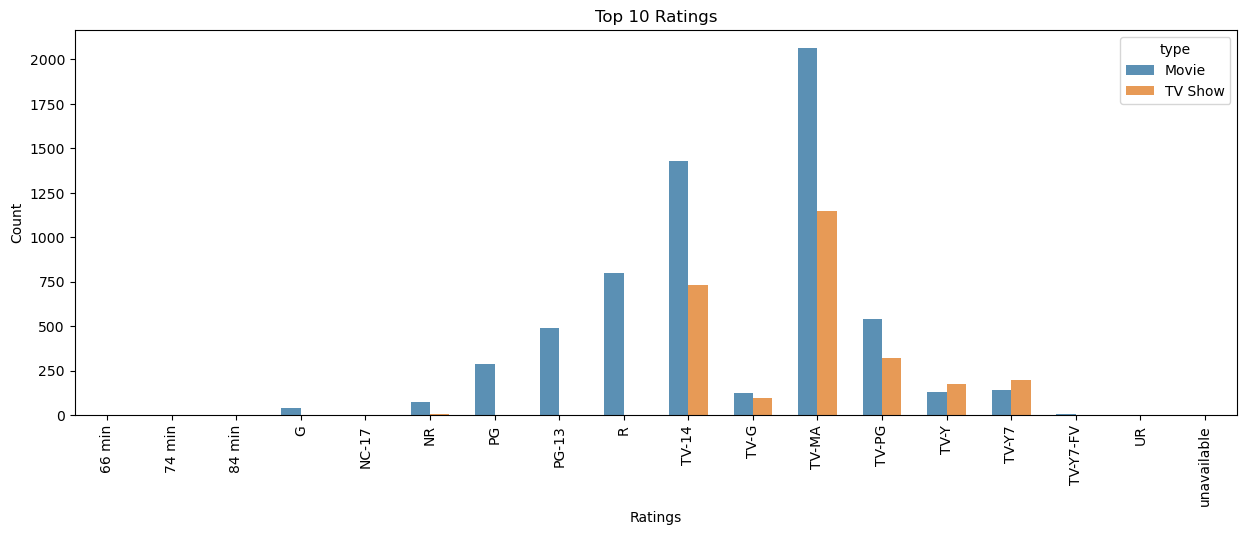

In [44]:
#plotting a hue barplot to compare rating counts of movies and TV Shows

plt.figure(figsize=(15,5))
sns.barplot(data=ratings,x='rating',y='count',hue=ratings['type'],alpha=0.8,width=0.6)
plt.ylabel('Count')
plt.xlabel('Ratings')
plt.title('Top 10 Ratings')
plt.xticks(rotation=90)
plt.show()

### Most reoccuring movie durations

In [45]:
# Grouped data by 'duration' and 'type', then counted occurrences and reset index

durations = df.groupby(['duration', 'type']).value_counts().reset_index()
durations

,duration,type,show_id,title,director,cast,country,date,release_year,rating,category,count
0,1 Season,TV Show,s100,On the Verge,unavailable,"Julie Delpy, Elisabeth Shue, Sarah Jones, Alex...","France, United States",2021-09-07 00:00:00,2021,TV-MA,"TV Comedies, TV Dramas",1
1,1 Season,TV Show,s1004,Zero,unavailable,"Giuseppe Dave Seke, Haroun Fall, Beatrice Gran...",Italy,2021-04-21 00:00:00,2021,TV-MA,"International TV Shows, TV Comedies, TV Dramas",1
2,1 Season,TV Show,s1026,Bakugan: Geogan Rising,unavailable,"Jonah Wineberg, Margarita Valderrama, Deven Ch...",unavailable,2021-04-16 00:00:00,2021,TV-Y7,"Anime Series, Kids' TV",1
3,1 Season,TV Show,s103,Countdown: Inspiration4 Mission to Space,Jason Hehir,unavailable,unavailable,2021-09-06 00:00:00,2021,TV-14,"Docuseries, Science & Nature TV",1
4,1 Season,TV Show,s1033,Love Naggers,unavailable,"Seo Jang-hoon, Kim Sook, Han Hye-jin, Kwak Jun...",South Korea,2021-04-16 00:00:00,2021,TV-14,"International TV Shows, Stand-Up Comedy & Talk...",1
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,99 min,Movie,s930,Dead Again in Tombstone,Roel Reiné,"Danny Trejo, Jake Busey, Elysia Rotaru, Dean M...",unavailable,2021-05-01 00:00:00,2017,R,"Action & Adventure, Horror Movies",1
8803,99 min,Movie,s953,The Whole Nine Yards,Jonathan Lynn,"Bruce Willis, Matthew Perry, Rosanna Arquette,...",United States,2021-05-01 00:00:00,2000,R,"Action & Adventure, Comedies",1
8804,unavailable,Movie,s5542,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04 00:00:00,2017,74 min,Movies,1
8805,unavailable,Movie,s5795,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16 00:00:00,2010,84 min,Movies,1


In [46]:
# Count occurrences of each Duration and create DataFrame (top 21)

duration = pd.DataFrame(df['duration'].value_counts().reset_index())[0:21]
duration.columns = ['Duration', 'Count']
duration

,Duration,Count
0,1 Season,1793
1,2 Seasons,425
2,3 Seasons,199
3,90 min,152
4,94 min,146
5,97 min,146
6,93 min,146
7,91 min,144
8,95 min,137
9,96 min,130


In [47]:
df_filter = df[df['type'] != 'unavailable']
durations = df_filter.groupby(['duration', 'type'])['duration'].value_counts().reset_index()
durations.head()

,duration,type,count
0,1 Season,TV Show,1793
1,10 Seasons,TV Show,7
2,10 min,Movie,1
3,100 min,Movie,108
4,101 min,Movie,116


<Figure size 1500x500 with 0 Axes>

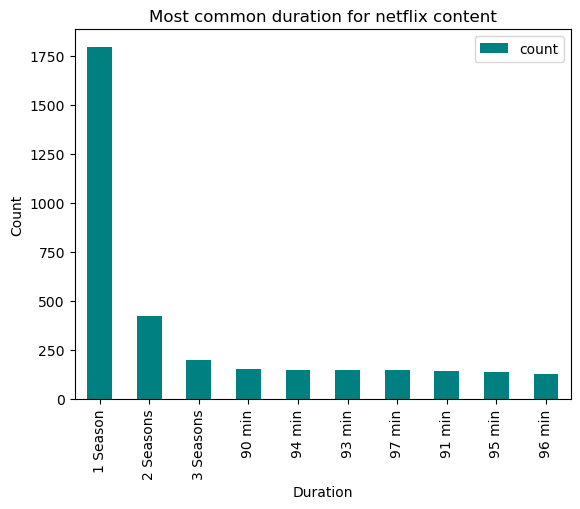

In [48]:
#Plotting the most common durations for all netflix content

top_durations = durations.sort_values(by='count', ascending=False).head(10)
plt.figure(figsize = (15,5))
top_durations.plot(x='duration', y='count', kind='bar', color = 'Teal')
plt.title('Most common duration for netflix content')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [49]:
durations.sort_values(by='count',ascending=False).head(10)

,duration,type,count
0,1 Season,TV Show,1793
110,2 Seasons,TV Show,425
138,3 Seasons,TV Show,199
210,90 min,Movie,152
214,94 min,Movie,146
213,93 min,Movie,146
217,97 min,Movie,146
211,91 min,Movie,144
215,95 min,Movie,137
216,96 min,Movie,130


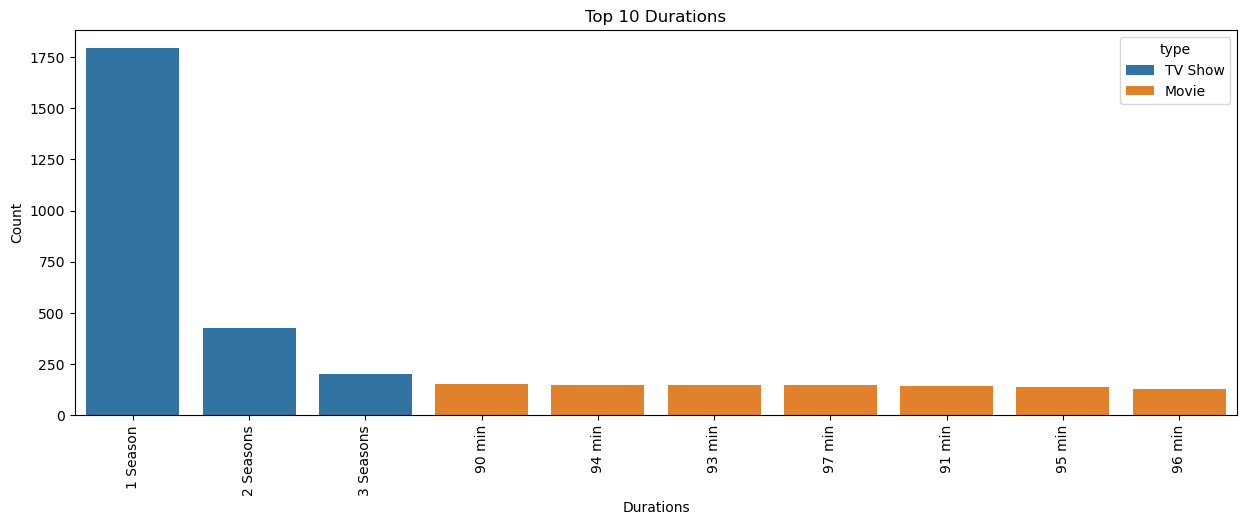

In [50]:
#Comparing the top durations for netflix TV Shows and Movies

top10_durations = durations.sort_values(by='count', ascending=False).head(10)
plt.figure(figsize=(15, 5))
sns.barplot(data=top10_durations, x='duration', y='count', hue=top10_durations['type'])  # Assuming 'type' is in df
plt.ylabel('Count')
plt.xlabel('Durations')
plt.title('Top 10 Durations')
plt.xticks(rotation=90)
plt.show()

# Results :

1. There are more movies than TV Series on Netflix at the approximate ratio of 70:30
2. USA, India and the UK are the leading countries with largest amount of Netflix media and content
3. UK has more TV Shows than India, whereas India takes the lead between the two with movies
4. Rajiv ChilakRaúl Campos, Jan Suter, and Suhas Kadav have directed the most number of movies in our dataset
5. The top directors for movies rarely dabble in TV Show direction.
6. For our dataset the largest number of releases peak at around the 2018-19, and then slightly decreases towards 2021
7. Consumers tend to prefer watching Dramas, International Movies, Children & Family Movies, and Comedies
8. The top category for Movies : Dramas, International movies, TV Shows : Documentries
9. TV-MA is the most consumed rated content i.e Content for Mature Audience
10. Most reouccring movie durations for Movies : 90 mins, TV Shows : 1 Season

# Insights :

1. Users are more likely to find movies than TV Shows on the platform
2. Platform preferable for audience consuming content from USA, India and UK
3. Rajiv ChilakRaúl Campos, Jan Suter, and Suhas Kadav fans can find good content on the platform.
4. Popular movie directors unlikely to make TV Shows for the platform.
5. Larger number of movies to browse through from the years 2018 - 2020
7. Platform has the largest pool Dramas, International Movies, Children & Family Movies, Documentries and Comedies
8. Platform suitable for a Mature Audience
9. Large number of 1 season shows and short movies of 90 mins.